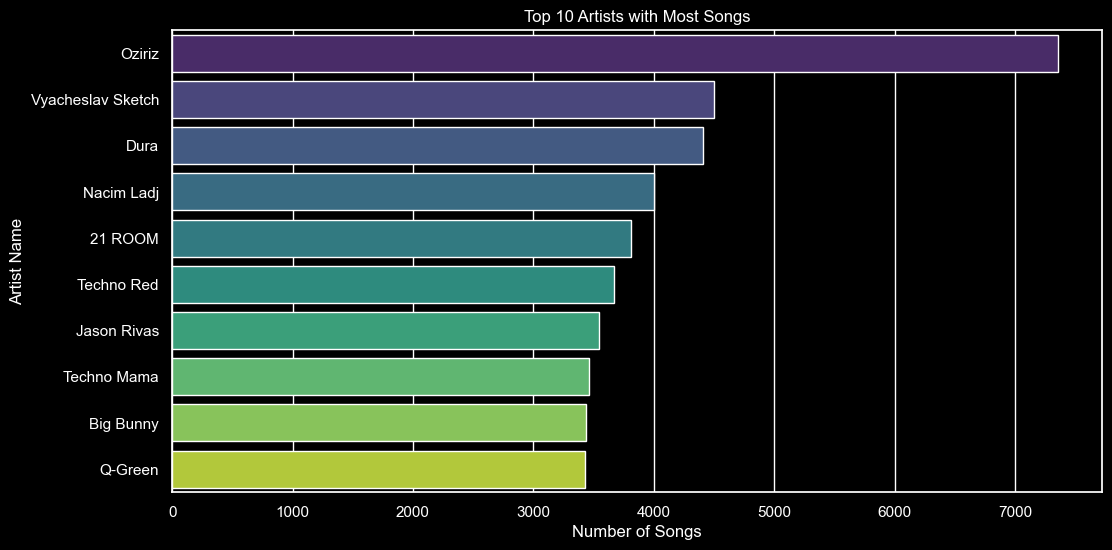

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV (replace with your file path)
df = pd.read_csv("top_artists_popularity.csv")

# Sort by song count and take the top 10
df_top = df.sort_values(by="song_count", ascending=False).head(10)

# Create figure with black background
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('black')  # Set entire figure background
ax.set_facecolor('black')  # Set axes background

# Apply dark theme
sns.set_theme(style="dark")

# Plot
sns.barplot(x="song_count", y="artist_name", hue="artist_name", data=df_top, palette="viridis", legend=False, ax=ax)

# Customize text colors
plt.xlabel("Number of Songs", color='white')
plt.ylabel("Artist Name", color='white')
plt.title("Top 10 Artists with Most Songs", color='white')

# Change tick colors
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Show plot
plt.show()

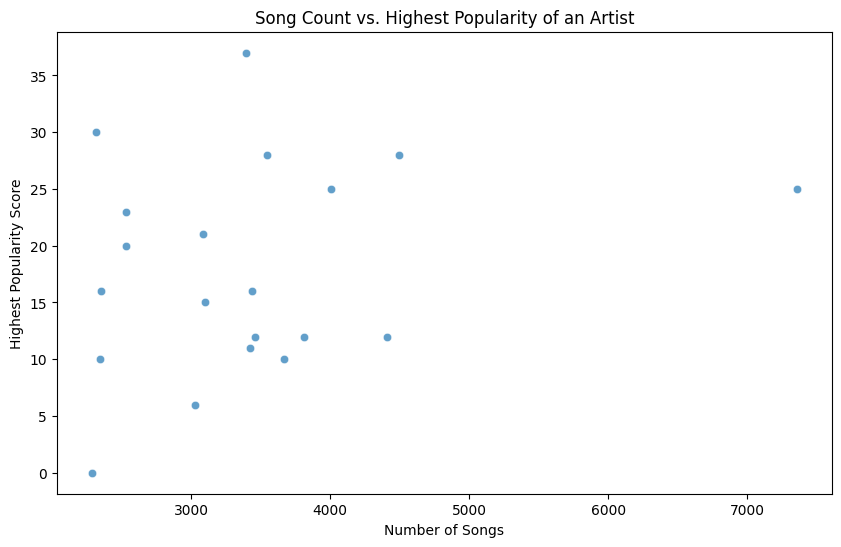

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="song_count", y="top_popularity", data=df, alpha=0.7)

plt.xlabel("Number of Songs")
plt.ylabel("Highest Popularity Score")
plt.title("Song Count vs. Highest Popularity of an Artist")
plt.show()

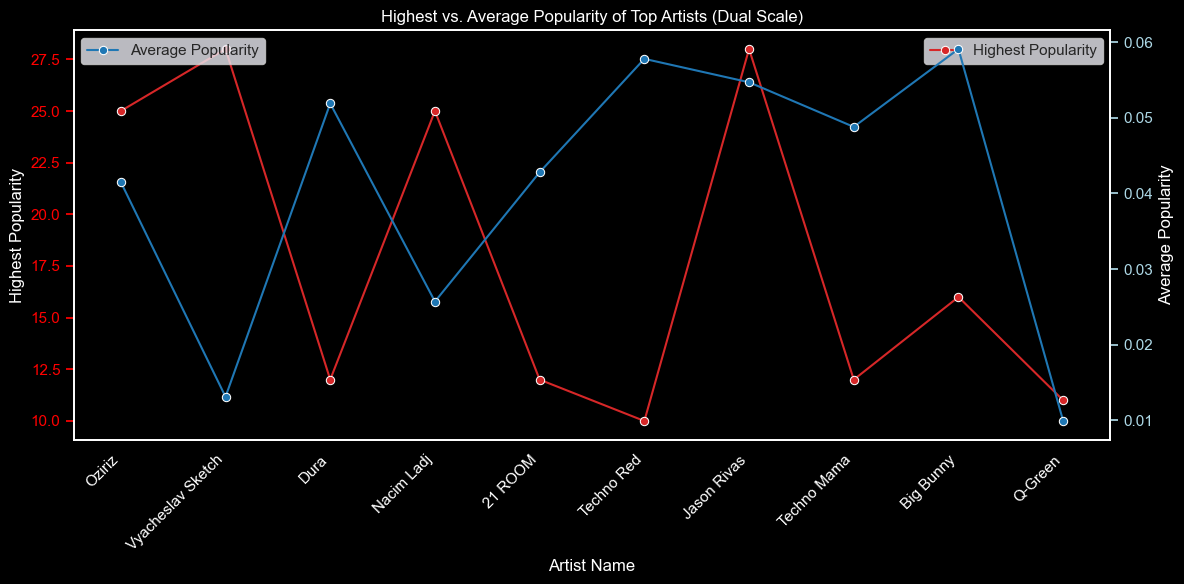

In [18]:
# Load both CSVs
df_highest = pd.read_csv("top_artists_popularity.csv")  # Has highest popularity
df_avg = pd.read_csv("top_artists_avg_popularity.csv")  # Has average popularity

# Rename `song_count` in one of the tables before merging
df_highest.rename(columns={"song_count": "song_count_highest"}, inplace=True)
df_avg.rename(columns={"song_count": "song_count_avg"}, inplace=True)

# Merge on artist_name
df_merged = df_highest.merge(df_avg, on="artist_name")

# Sort by song count (from df_highest since both should be identical in count)
df_sorted = df_merged.sort_values(by="song_count_highest", ascending=False).head(10)

sns.set_theme(style="darkgrid")  # Other options: "whitegrid", "dark", "white"

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis (Highest Popularity)
fig.patch.set_facecolor('black')  # Entire figure background
ax1.set_facecolor('black')  # First y-axis background
color = 'tab:red'
ax1.set_xlabel("Artist Name")
ax1.set_ylabel("Highest Popularity", color=color)
sns.lineplot(x="artist_name", y="top_popularity", data=df_sorted, label="Highest Popularity", marker="o", ax=ax1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis (Average Popularity)
ax2 = ax1.twinx()
ax2.set_facecolor('black')  # Second y-axis background
color = 'tab:blue'
ax2.set_ylabel("Average Popularity", color=color)
sns.lineplot(x="artist_name", y="avg_popularity", data=df_sorted, label="Average Popularity", marker="o", ax=ax2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Change tick & label colors for better visibility
ax1.xaxis.label.set_color('white')
ax1.yaxis.label.set_color('white')
ax2.yaxis.label.set_color('white')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='red')  # Highest popularity axis
ax2.tick_params(axis='y', colors='lightblue')  # Avg popularity axis

# Title color
plt.title("Highest vs. Average Popularity of Top Artists", color='white')

# Formatting
ax1.grid(False)
ax2.grid(False)
ax1.set_xticks(range(len(df_sorted)))  # Set tick positions
ax1.set_xticklabels(df_sorted["artist_name"], rotation=45, ha="right")  # Set labels
fig.tight_layout()
plt.title("Highest vs. Average Popularity of Top Artists (Dual Scale)")

plt.show()